# A Whale off the Port(folio)
Alexis Santoyo
___

In [567]:
# Inital Imports 

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

## Whale Returns

In [568]:
# Set file paths 
whale_returns = Path("../Whale_Analysis/Resources/whale_returns.csv")

# Reading Whale Returns 

whale = pd.read_csv(whale_returns, parse_dates=True, infer_datetime_format=True, index_col="Date")


In [569]:
# Count nulls
whale.isnull().sum()

# Drop nulls
whale = whale.dropna()


whale.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [323]:
whale.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

In [324]:
# Set file paths 
algo_returns = Path("../Whale_Analysis/Resources/algo_returns.csv")

# Reading Algorithmic Returns 
algo = pd.read_csv(algo_returns, parse_dates=True, infer_datetime_format=True, index_col="Date")

In [325]:
# Count nulls
algo.isnull().sum()

# Drop nulls
algo = algo.dropna()


algo.head()



,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [326]:
algo.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

In [581]:
# Set file paths 
s_p500_returns = Path("../Whale_Analysis/Resources/sp500_history.csv")

# Reading S&P 500 Closing Prices

s_p500 = pd.read_csv(s_p500_returns, parse_dates=True, infer_datetime_format=True, index_col="Date")

s_p500.dtypes

Close    object
dtype: object

In [582]:
# Fixing data types by using .replace to remove dollar sign. Then using astype(float) to fix data type.


In [583]:
s_p500['Close'] = s_p500['Close'].str.replace(',', '').str.replace('$', '').astype('float')


<ipython-input-583-0dcef0b5972d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  s_p500['Close'] = s_p500['Close'].str.replace(',', '').str.replace('$', '').astype('float')


In [584]:
s_p500.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [585]:
s_p500.dtypes

Close    float64
dtype: object

In [586]:

# Calculate Daily Returns
sp500_daily_returns = s_p500.pct_change()
print(sp500_daily_returns)

               Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1649 rows x 1 columns]


In [587]:
# Drop nulls
s_p500 = sp500_daily_returns.dropna()

In [588]:
# Rename `Close` Column to be specific to this portfolio.
s_p500 = sp500_daily_returns.rename(columns={'Close' : 'SP500'})

In [589]:
s_p500.tail()

,SP500
Date,
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611
2012-10-01,-0.000872


---

# Quantitative Analysis

# Performance Analysis

#### Calculate and Plot the daily returns.

In [590]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([whale, algo, s_p500], axis="columns", join="inner")
combined_df.sort_index(inplace=True)

In [591]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:xlabel='Date'>

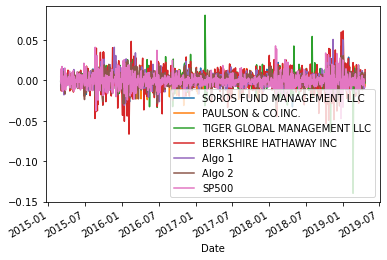

In [592]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

In [593]:
# Calculate cumulative returns of all portfolios 
# Use the `cumprod` function to calculate cumulative returns
cumulative_return = (1 + combined_df).cumprod()
cumulative_return.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:xlabel='Date'>

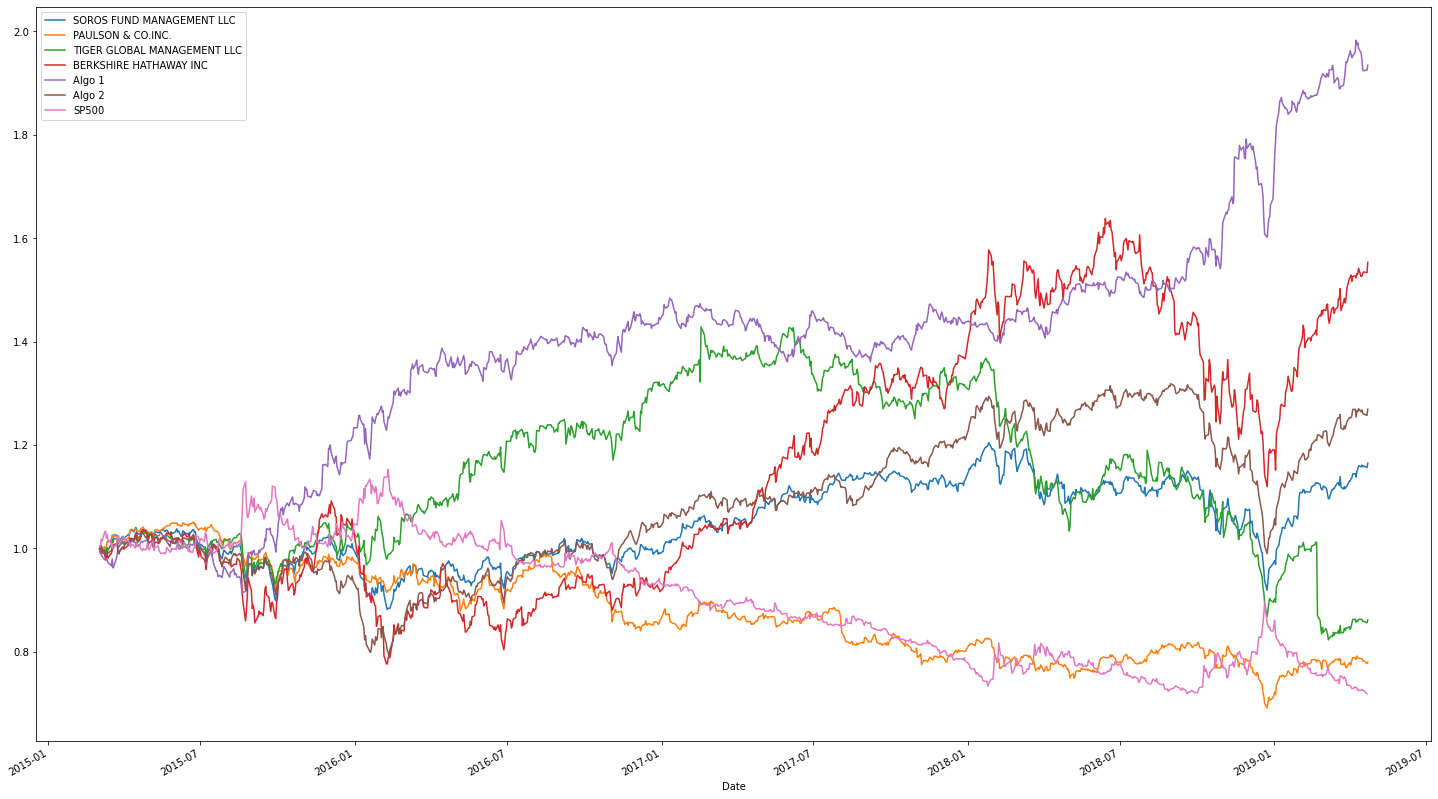

In [594]:
# Plot cumulative returns
cumulative_return.plot(figsize=(25, 15))


## Risk Analysis

Determine the risk of each portfolio:


### Create a box plot for each portfolio

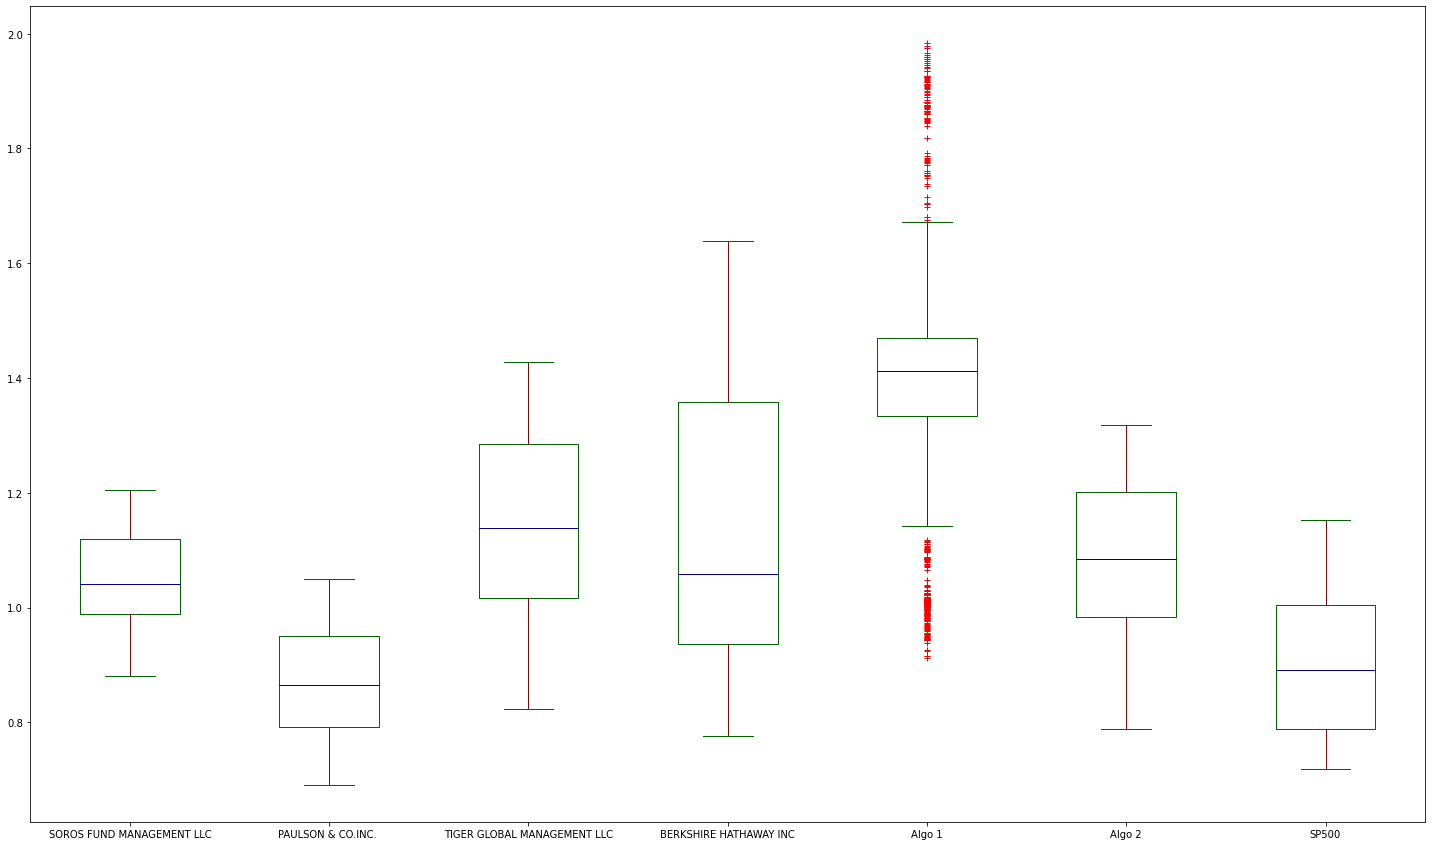

In [595]:
# Box plot to visually show risk
cumulative_return.plot.box(color=color, sym="r+", figsize=(25, 15))
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkRed",
    "medians": "DarkBlue",
    "caps": "DarkGreen",
    }

### Calculate Standard Deviations

In [596]:
# Calculate the daily standard deviations of all portfolios
# Use the `std` function
std = cumulative_return.std()
std.sort_values(inplace=True)
std

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
SP500                          0.114846
Algo 2                         0.131700
TIGER GLOBAL MANAGEMENT LLC    0.149844
Algo 1                         0.232277
BERKSHIRE HATHAWAY INC         0.241575
dtype: float64

In [597]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = cumulative_return.std() * np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
SP500                          1.823124
Algo 2                         2.090678
TIGER GLOBAL MANAGEMENT LLC    2.378706
Algo 1                         3.687285
BERKSHIRE HATHAWAY INC         3.834878
dtype: float64

### Portfolios that are riskier then the S&P500 include Algo 2, Tiger Global, Algo 1 and Berkshire Hathaway. A volatile portfolio has a higher standard deviation. While a portfolio that has a lower standard deviation has lower volatility. 


----

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [598]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cumulative_return_21day = cumulative_return.rolling(21).std()
cumulative_return_21day.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-16,0.015161,0.006735,0.009682,0.024240,0.030854,0.013194,0.009860
2019-04-17,0.015822,0.006653,0.009581,0.024055,0.030134,0.013304,0.009876
2019-04-18,0.016203,0.006653,0.008938,0.023721,0.028077,0.013368,0.010126
2019-04-22,0.016683,0.006617,0.008957,0.023979,0.025705,0.013345,0.009889
2019-04-23,0.016883,0.006512,0.008323,0.021949,0.023190,0.012799,NaN


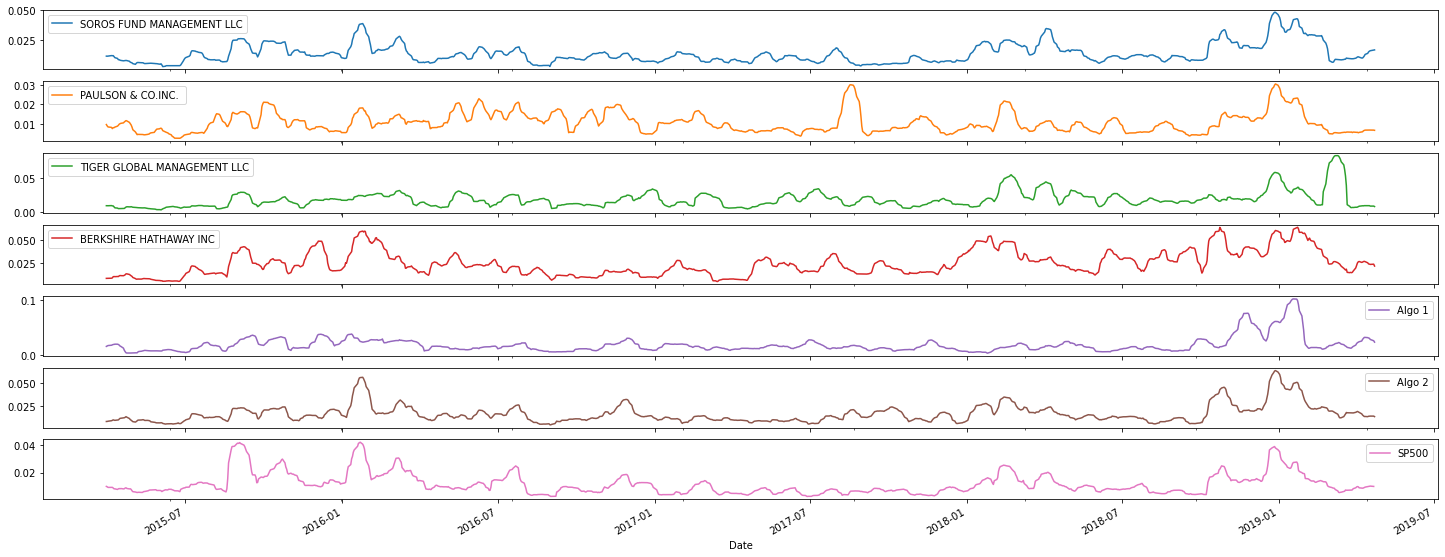

In [599]:
# Plot the rolling standard deviation
rstd = cumulative_return.rolling(21).std().plot(subplots=True, figsize=(25,10))

### Calculate and plot the correlation

In [600]:
# Calculate the correlation
correlation = cumulative_return.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,-0.653129,0.327728,0.898896,0.470156,0.915163,-0.883445
PAULSON & CO.INC.,-0.653129,1.000000,-0.193595,-0.780559,-0.830635,-0.767196,0.859080
TIGER GLOBAL MANAGEMENT LLC,0.327728,-0.193595,1.000000,0.031632,0.052669,0.177653,-0.196116
BERKSHIRE HATHAWAY INC,0.898896,-0.780559,0.031632,1.000000,0.579663,0.945500,-0.923948
Algo 1,0.470156,-0.830635,0.052669,0.579663,1.000000,0.588982,-0.742933
Algo 2,0.915163,-0.767196,0.177653,0.945500,0.588982,1.000000,-0.962617
SP500,-0.883445,0.859080,-0.196116,-0.923948,-0.742933,-0.962617,1.000000


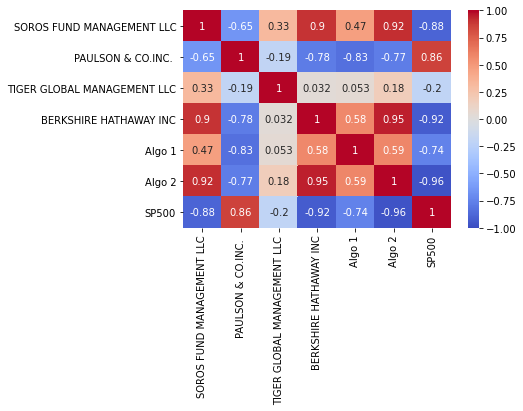

In [601]:
# Display the correlation matrix
cor = sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [602]:
comb_a_s = pd.concat([algo, s_p500], axis="columns", join="inner")
comb_a_s.sort_index(inplace=True)
comb_a_s.head()

,Algo 1,Algo 2,SP500
Date,,,
2014-06-05,0.004062,0.013285,-0.004606
2014-06-06,0.001857,0.008284,-0.000938
2014-06-09,-0.005012,0.005668,0.000246
2014-06-10,0.004406,-0.000735,0.003550
2014-06-11,0.004760,-0.003761,0.007139


In [603]:
comb_a_s.drop(columns=['Algo 1'], inplace=True)
comb_a_s.head()

,Algo 2,SP500
Date,,
2014-06-05,0.013285,-0.004606
2014-06-06,0.008284,-0.000938
2014-06-09,0.005668,0.000246
2014-06-10,-0.000735,0.003550
2014-06-11,-0.003761,0.007139


In [604]:
# Calculate covariance of a single portfolio
covariance= comb_a_s['Algo 2'].cov(comb_a_s['SP500'])
covariance


-8.253751346434804e-07

In [605]:
# Calculate variance of S&P 500
variance= comb_a_s['SP500'].var()
variance

7.119124631866772e-05

In [606]:
# Computing beta
sp500_beta = covariance / variance
sp500_beta


-0.01159377279263969

In [607]:
# Plot beta trend
rolling_covariance = comb_a_s['Algo 2'].rolling(window=60).cov(comb_a_s['SP500'])
rolling_variance = comb_a_s['SP500'].rolling(window=60).var()

<AxesSubplot:xlabel='Date'>

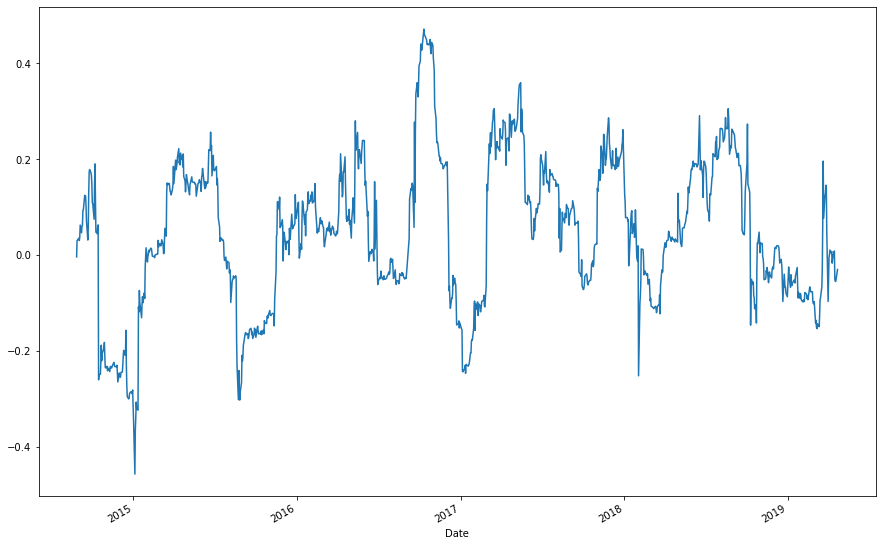

In [608]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(15, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [609]:
# Use `ewm` to calculate the rolling window



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [610]:
# Annualized Sharpe Ratios  re: (https://www.codearmo.com/blog/sharpe-sortino-and-calmar-ratios-python)
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.0 # risk free rate
sharpes = combined_df.apply(sharpe_ratio, args=(N,rf,),axis=0)


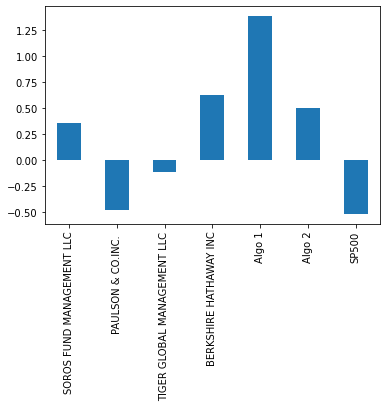

In [611]:
# Visualize the sharpe ratios as a bar plot
sharp = sharpes.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic strategy outperofrmed both the S&P 500 and the whale portfolios. Algorithmic 1 got a sharpe ratio of 1.25. The S&P500 and Paulson & CO. Inc. had the lowest sharpe ratio of all portfolios.    

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

In [653]:
# Reading data from 1st stock
tsla_path = Path("../Whale_Analysis/Resources/Tesla (1).csv")

# Read
tsla_data = pd.read_csv(tsla_path, parse_dates=True, infer_datetime_format=True, index_col="Date")

tsla_data.head()


,Close
Date,
2017-04-10,62.48
2017-04-11,61.74
2017-04-12,59.37
2017-04-13,60.80
2017-04-17,60.29


In [654]:
# Reading data from 1st stock
aapl_path = Path("../Whale_Analysis/Resources/AAPL.csv")

# Read
aapl_data = pd.read_csv(aapl_path, parse_dates=True, infer_datetime_format=True, index_col="Date")

aapl_data.head()

,Close
Date,
2017-04-10,35.79
2017-04-11,35.41
2017-04-12,35.45
2017-04-13,35.26
2017-04-17,35.46


In [655]:
# Reading data from 3rd stock
sbux_path = Path("../Whale_Analysis/Resources/SBUX.csv")

# Read
sbux_data = pd.read_csv(sbux_path, parse_dates=True, infer_datetime_format=True, index_col="Date")

sbux_data.head()

,Close
Date,
2017-04-10,57.95
2017-04-11,57.88
2017-04-12,57.58
2017-04-13,57.51
2017-04-17,58.08


In [656]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([ aapl_data, sbux_data, tsla_data], axis="columns", join="inner")
my_portfolio_df.sort_index(inplace=True)

my_portfolio_df.head()

,Close,Close,Close
Date,,,
2017-04-10,35.79,57.95,62.48
2017-04-11,35.41,57.88,61.74
2017-04-12,35.45,57.58,59.37
2017-04-13,35.26,57.51,60.80
2017-04-17,35.46,58.08,60.29


In [657]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_df.columns = ['AAPL', 'SBUX', 'TSLA']

In [658]:
my_portfolio_df.head()

,AAPL,SBUX,TSLA
Date,,,
2017-04-10,35.79,57.95,62.48
2017-04-11,35.41,57.88,61.74
2017-04-12,35.45,57.58,59.37
2017-04-13,35.26,57.51,60.80
2017-04-17,35.46,58.08,60.29


In [659]:
# Calculate daily returns
my_portfolio_dayreturns = my_portfolio_df.pct_change()
my_portfolio_dayreturns.head()


,AAPL,SBUX,TSLA
Date,,,
2017-04-10,NaN,NaN,NaN
2017-04-11,-0.010617,-0.001208,-0.011844
2017-04-12,0.001130,-0.005183,-0.038387
2017-04-13,-0.005360,-0.001216,0.024086
2017-04-17,0.005672,0.009911,-0.008388


In [660]:
# Drop NAs
my_portfolio_dayreturns.dropna(inplace=True)

my_portfolio_dayreturns.head()

,AAPL,SBUX,TSLA
Date,,,
2017-04-11,-0.010617,-0.001208,-0.011844
2017-04-12,0.001130,-0.005183,-0.038387
2017-04-13,-0.005360,-0.001216,0.024086
2017-04-17,0.005672,0.009911,-0.008388
2017-04-18,-0.004512,0.004649,-0.003981


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [661]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
myportfolio_returns = my_portfolio_dayreturns.dot(weights)
myportfolio_returns.head()

Date
2017-04-11   -0.007890
2017-04-12   -0.014147
2017-04-13    0.005837
2017-04-17    0.002398
2017-04-18   -0.001281
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [671]:
# Join your returns DataFrame to the original returns DataFrame
myportfolio_combined_df = pd.concat([myportfolio_returns, combined_df], axis="columns", join="inner")
myportfolio_combined_df.columns = ['My_Portfolio', 'SOROS FUND', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'SP500']
myportfolio_combined_df.head()

,My_Portfolio,SOROS FUND,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2017-04-11,-0.007890,-0.001472,-0.007032,0.000333,-0.003330,-0.006879,0.001766,0.003774
2017-04-12,-0.014147,-0.005125,-0.003205,0.008182,0.001104,0.001635,-0.007078,0.006861
2017-04-13,0.005837,-0.006648,-0.002293,-0.005397,-0.009069,0.006234,-0.007669,-0.008540
2017-04-17,0.002398,0.007112,0.000925,0.003172,0.009341,0.008784,0.006105,0.002912
2017-04-18,-0.001281,0.000303,-0.006847,0.004907,-0.001164,-0.003365,-0.003574,0.001719


In [672]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
volatility = myportfolio_combined_df.std() * np.sqrt(252)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [673]:
# Calculate the annualized `std`
annualized_std = myportfolio_combined_df.std() * np.sqrt(252)
annualized_std.head()

My_Portfolio                   0.235327
SOROS FUND                     0.129587
PAULSON & CO.INC.              0.109541
TIGER GLOBAL MANAGEMENT LLC    0.188670
BERKSHIRE HATHAWAY INC         0.207257
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

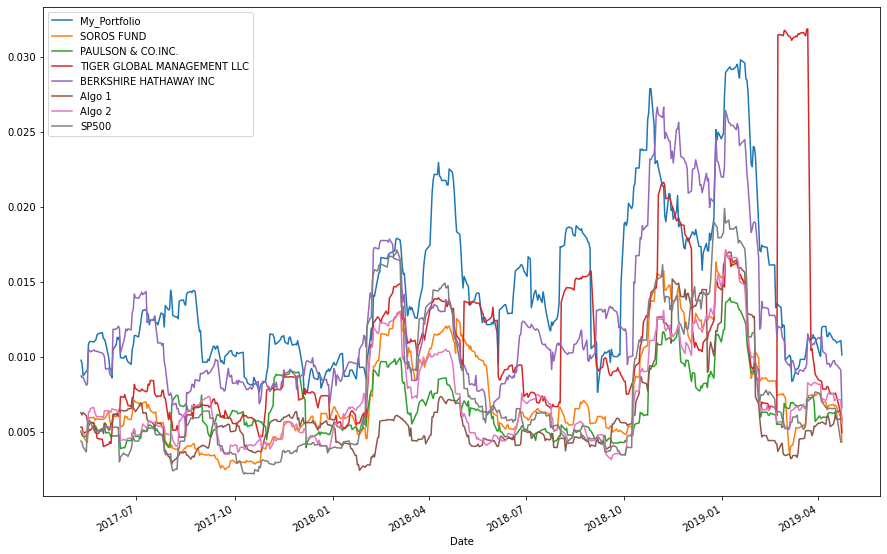

In [678]:
# Calculate rolling standard deviation
myportfolio_combined_df.rolling(21).std().plot(figsize=(15, 10))



### Calculate and plot the correlation

In [681]:
# Calculate and plot the correlation
correlation2 = myportfolio_combined_df.corr()
correlation2

,My_Portfolio,SOROS FUND,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
My_Portfolio,1.000000,0.540914,0.418772,0.336394,0.598594,0.158058,0.545545,0.082368
SOROS FUND,0.540914,1.000000,0.712194,0.506506,0.767177,0.279143,0.803441,0.014453
PAULSON & CO.INC.,0.418772,0.712194,1.000000,0.458966,0.585776,0.291386,0.734908,-0.010842
TIGER GLOBAL MANAGEMENT LLC,0.336394,0.506506,0.458966,1.000000,0.372618,0.107915,0.462085,-0.013037
BERKSHIRE HATHAWAY INC,0.598594,0.767177,0.585776,0.372618,1.000000,0.250213,0.746837,-0.017315
Algo 1,0.158058,0.279143,0.291386,0.107915,0.250213,1.000000,0.284143,-0.054374
Algo 2,0.545545,0.803441,0.734908,0.462085,0.746837,0.284143,1.000000,-0.013199
SP500,0.082368,0.014453,-0.010842,-0.013037,-0.017315,-0.054374,-0.013199,1.000000


<AxesSubplot:>

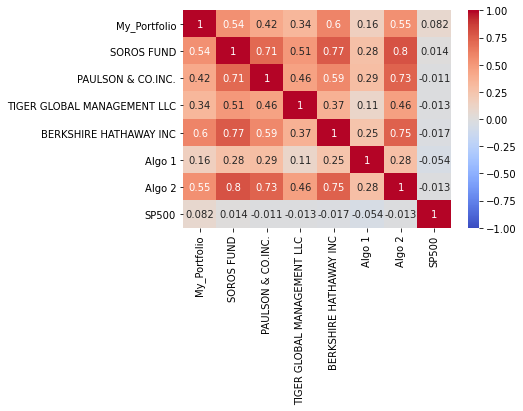

In [701]:
# Create a heatmap from the correlation values
sns.heatmap(correlation2, annot=True,  vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [690]:
portfolio_500 = pd.concat([myportfolio_returns, s_p500], axis="columns", join="inner")
portfolio_500.sort_index(inplace=True)
portfolio_500.columns = ['My_Portfolio', 'SP500']
portfolio_500.head()

,My_Portfolio,SP500
Date,,
2017-04-11,-0.007890,0.003774
2017-04-12,-0.014147,0.006861
2017-04-13,0.005837,-0.008540
2017-04-17,0.002398,0.002912
2017-04-18,-0.001281,0.001719


In [691]:
# Calculate rolling standard deviation
covariance = portfolio_500['My_Portfolio'].cov(portfolio_500['SP500'])
covariance

1.0484542499945472e-05

In [692]:
variance = portfolio_500['My_Portfolio'].var()
variance

0.00021975695963473524

In [693]:
portfolio_beta = covariance / variance
portfolio_beta

0.04770971766888362

In [694]:
rolling_covariance = portfolio_500['My_Portfolio'].rolling(window=60).cov(portfolio_500['SP500'])
rolling_variance = portfolio_500['SP500'].rolling(window=60).var()

<AxesSubplot:xlabel='Date'>

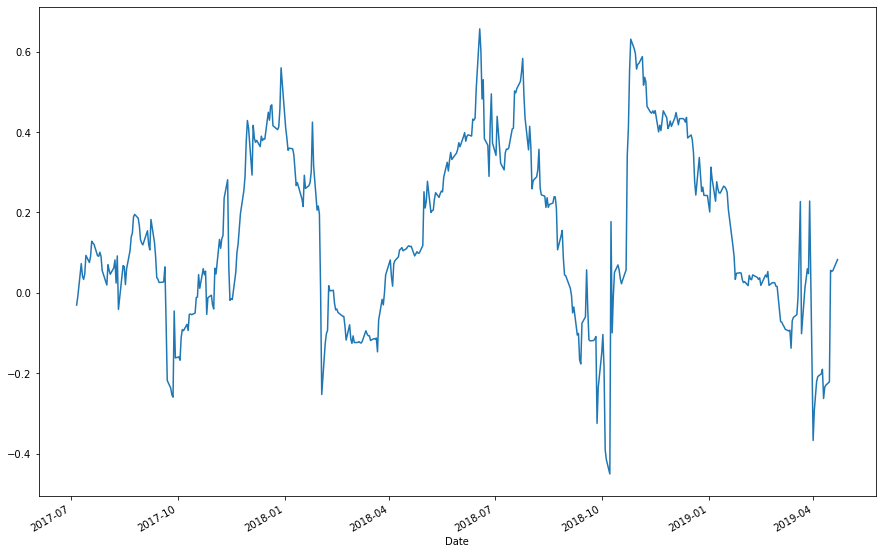

In [695]:
# Plot rolling standard deviation
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(15, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [698]:
# Calculate Annualzied Sharpe Ratios
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.0 # risk free rate
sharpes = myportfolio_combined_df.apply(sharpe_ratio, args=(N,rf,),axis=0)

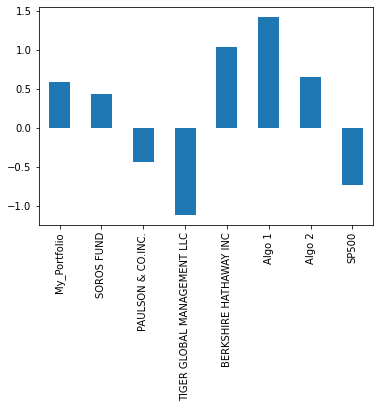

In [699]:
# Visualize the sharpe ratios as a bar plot
sharp = sharpes.plot.bar()

### How does your portfolio do?

Write your answer here!

My portfolio did rekativily well compared to the S&P500 and Tiger Global. My portfolio got a sharp ratio over 0.5. My portfolio was highly correlated with Berkshire Hathawat inc with a correlation coefficient of 0.6. My portfolio was least correlated with the S&P500. With a correlation coefficent of 0.08. 

### References and Resources

https://stackoverflow.com/questions/1155617/count-the-number-of-occurrences-of-a-character-in-a-string
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python/46430853
https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
https://www.codearmo.com/blog/sharpe-sortino-and-calmar-ratios-python
http://techflare.blog/how-to-calculate-historical-volatility-and-sharpe-ratio-in-python/